In [17]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Optional: make plots appear inline if you're in Jupyter
%matplotlib inline


In [18]:
# Clientul raspunde la al cincilea apel
observed_failures = 4


In [19]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=2, beta=2)

    # Likelihood: Geometric using the observed data
    Y_obs = pm.Geometric("Y_obs", p=p, observed=observed_failures)

    # Draw samples from the posterior
    trace = pm.sample(5000, chains=2, tune=4000, random_seed=42)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 4_000 tune and 5_000 draw iterations (8_000 + 10_000 draws total) took 10 seconds.


    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.376  0.163   0.085    0.674      0.002    0.002    4268.0    6077.0   

   r_hat  
p    1.0  


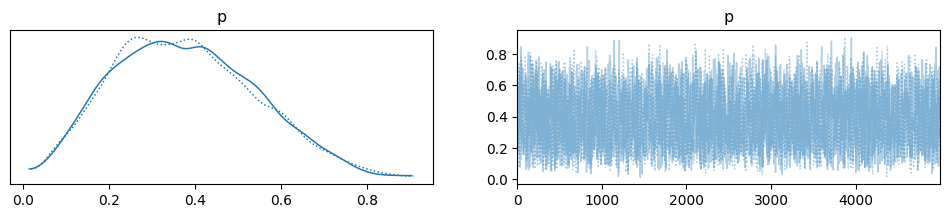

In [20]:
summary = az.summary(trace, var_names=["p"])
print(summary)

az.plot_trace(trace, var_names=["p"])
plt.show()


Posterior mean of p = 0.37616622782692566


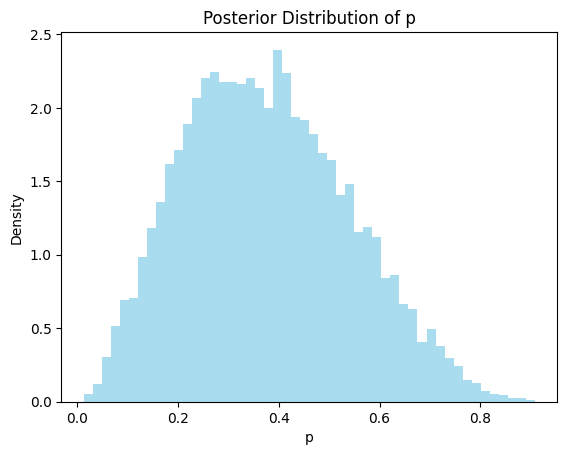

In [21]:
# Posterior mean of p
posterior_mean = trace.posterior["p"].mean().values
print("Posterior mean of p =", posterior_mean)

# Extract all posterior samples of p
samples = trace.posterior["p"].stack(draws=("chain","draw")).values

# Plot a histogram of the posterior samples
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title("Posterior Distribution of p")
plt.xlabel("p")
plt.ylabel("Density")
plt.show()
